In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SparkSession
#create spark session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, DecimalType, DateType, BooleanType
from pyspark.sql.functions import col, when, sum, avg, row_number 
from pyspark.sql.window import Window

In [0]:
# command to keep the data type of columns same as that in source file

ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv", header = "true", inferschema = "true")

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

In [0]:
match_df = spark.read.schema(match_schema).format("csv").load("s3://ipl-data-analysis-project/Match.csv", header = "true", inferschema = "true")

In [0]:
player_schema = schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

In [0]:
player_df = spark.read.schema(player_schema).format("csv").load("s3://ipl-data-analysis-project/Player.csv", header = "true", inferschema = "true")

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])


In [0]:
player_match_df = spark.read.schema(player_match_schema).format("csv").load("s3://ipl-data-analysis-project/Player_match.csv",header = "true",inferschema = "true")

In [0]:
player_match_df.count()

Out[12]: 13993

In [0]:
team_schema =  StructType([
    StructField("team_sk", IntegerType(), True),  # team_sk: integer
    StructField("team_id", IntegerType(), True),  # team_id: integer
    StructField("team_name", StringType(), True)  # team_name: string
])

In [0]:
team_df = spark.read.schema(team_schema).format("csv").load("s3://ipl-data-analysis-project/Team.csv",header = "true", inferschema = "true")

In [0]:
#filter to include only valid deliveries (removing wide ball and no ball)
ball_by_ball_df = ball_by_ball_df.filter((col("wides")==0) & (col("noballs") ==0))

#Aggregation: Calculate total runs and average runs scored in each match and inning
total_and_avg_runs = ball_by_ball_df.groupBy("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)

In [0]:
#calculating running total of runs for each match in each over
windowSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)

In [0]:
#conditional column: flag for high impact balls (either a wicket or more than 6 runs including extras)
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when(((col("runs_scored")+ col("extra_runs"))> 6) | (col("bowler_wicket")== True), True).otherwise(False)
)

In [0]:
ball_by_ball_df.show()

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

#Extracting year, month, day from the match date for more detailed time based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month",month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

#High margin win: categorizing win margins into high, medium and low

match_df = match_df.withColumn(
    "win_margin_category", 
    when (col("win_margin")>= 100, "High").
    when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium").otherwise("Low")
)

#Analyze the impact of the toss: who wins the toss and the match both

match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("match_winner") == col("toss_winner"), "Yes").
    otherwise("No")
)



In [0]:
from pyspark.sql.functions import regexp_replace, lower

#clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name","[^a-zA-Z0-9 ]","")))

#replace missing values in "batting_hand", "bowling_skill" with a default unknown
player_df = player_df.na.fill({"batting_hand" : "unknown", "bowling_skill": "unknown"})

#categorizing player based on batting hand
player_df = player_df.withColumn("batting_style",
                                 when(col("batting_hand").contains("Left"),"Left-Handed").otherwise("Right-Handed") )

player_df.show(2)


+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1| sc ganguly|null| Left-hand bat|Right-arm medium|       India|  Left-Handed|
|        1|        2|bb mccullum|null|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows



In [0]:
from pyspark.sql.functions import col, when, current_date

#Add a veteran_status col based on player's age
player_match_df = player_match_df.withColumn( "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
) 


#Dynamic column to calculate years since debut
player_match_df = player_match_df.withColumn("years_since_debut",
                                             year(current_date())- col("season_year") )
#Show year
player_match_df.count()

Out[21]: 13993

In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
player_match_df.count()

Out[23]: 13993

In [0]:
top_scoring_batsman_per_season = spark.sql("""
                                           select p.player_name,m.season_year, sum(b.runs_scored) as total_runs
                                           from ball_by_ball b,match m,player_match pm,player p
                                           where b.match_id = m.match_id
                                           and m.match_id = pm.match_id and b.striker = pm.player_id
                                           and p.player_id = pm.player_id
                                           group by p.player_name, m.season_year 
                                           order by m.season_year, total_runs desc
                                           """)

In [0]:
top_scoring_batsman_per_season.show(5)

+-------------+-----------+----------+
|  player_name|season_year|total_runs|
+-------------+-----------+----------+
|     se marsh|       2008|       614|
|    g gambhir|       2008|       532|
|st jayasuriya|       2008|       508|
|    sr watson|       2008|       463|
|     gc smith|       2008|       437|
+-------------+-----------+----------+
only showing top 5 rows



In [0]:
#which bowler was most economical in the powerplay
economic_bowler_powerplay = spark.sql("""
select p.player_name, AVG(b.runs_scored) as avg_runs_per_ball, COUNT(b.bowler_wicket) as total_wickets
from ball_by_ball b 
JOIN player_match pm ON  b.match_id = pm.match_id and b.bowler = pm.player_id
join player p on p.player_id = pm.player_id
where over_id <=6
group by p.player_name
having count(*)>120
order by avg_runs_per_ball, total_wickets desc

""")

economic_bowler_powerplay.show(5)

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|smsm senanayake|0.8492063492063492|            0|
|      sp narine| 0.929718875502008|            0|
|     gd mcgrath|0.9324324324324325|            0|
|     sl malinga|0.9407630522088354|            0|
|  sohail tanvir| 0.946969696969697|            0|
+---------------+------------------+-------------+
only showing top 5 rows



In [0]:
#toss impact on individual matches
toss_impact_individual_matches = spark.sql("""
                                           select m.match_id, m.toss_winner, m.toss_name, m.match_winner,
                                           CASE WHEN m.toss_winner = m.match_winner then "Won" else "Lost" end as match_outcome
                                           from match m
                                           where m.toss_name is not null
                                        order by m.match_id
                                           """)
toss_impact_individual_matches.show(5)

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
+--------+--------------------+---------+--------------------+-------------+
only showing top 5 rows



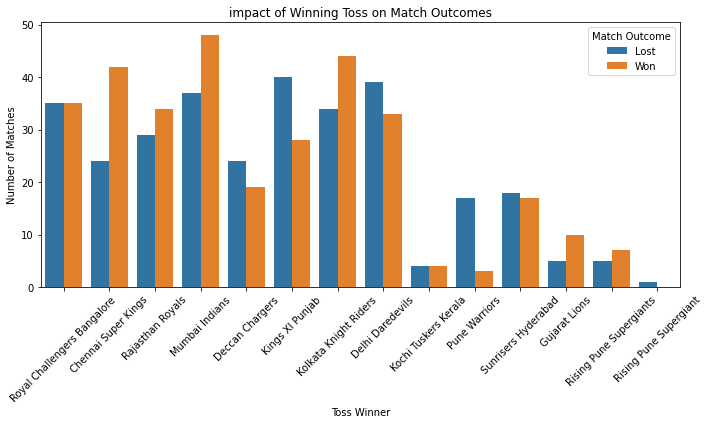

In [0]:
#creating a countplot to see win/loss after winning toss
import matplotlib.pyplot as plt
import seaborn as sns
toss_impact_pd = toss_impact_individual_matches.toPandas()
plt.figure(figsize=(10,6))
sns.countplot(x= 'toss_winner', hue = 'match_outcome', data = toss_impact_pd)
plt.title('impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title = 'Match Outcome')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()